In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xyStripTools
import root_pandas as rp
import pandas as pd

from xyStripTools import T_off
from xyStripTools import plot_track

Welcome to JupyROOT 6.18/00


In [2]:
# The time offset distributions measured for all quadrants of all detectors
# See the Micromegas nimA paper for more information
T_off

,Name,Mu,Mu_err,Sigma,Sigma_err
0,UH DLC a,-6.684141,0.031719,16.382493,0.024764
1,UH DLC b,-5.208232,0.034228,16.305925,0.026783
2,UH DLC c,6.752723,0.038583,14.113659,0.031446
3,UH DLC d,6.852294,0.058807,14.800689,0.048234
4,UH NoDLC a,5.703480,0.075588,19.574833,0.061573
5,UH NoDLC b,5.473110,0.114114,19.799337,0.092169
6,UH NoDLC c,25.241775,0.189180,18.082547,0.159142
7,UH NoDLC d,20.674842,0.698955,17.886667,0.626167
8,UoS,-11.400385,0.026963,15.290716,0.021079


# Load Raw Electron Recoil Simulation

In [3]:
#Select the gas
gas = 'he_co2'

# Energies to calculate
Energy = 50


# Path to degrad dataframe
file_path = './data/'+gas+'_'+str(Energy)+'keV_' + str(0) + '.root'

tracks = rp.read_root(file_path)
tracks["track"]=tracks.apply(lambda row: np.array([row.x,row.y,row.z]).T ,axis=1)
tracks


/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  warn_missing_tree)
/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  warn_missing_tree)
/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias 

,event_number,npoints,x,y,z,t,q,track
0,0,1421,"[-1.5426118, -0.0019720069, -0.00061417016, -0...","[0.19716597, 0.00056022295, -0.00045838192, 0....","[2.1356885, 0.0156014655, 0.02021377, 0.024035...","[780.9511, 247.36115, 62.035988, 2.1953566, 14...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-1.5426118, 0.19716597, 2.1356885], [-0.0019..."
1,1,1455,"[-2.2493606, 0.00011934366, 0.0045819758, 0.00...","[-1.6356924, -0.00047184023, -0.0052855257, -0...","[4.7116556, 0.029556258, 0.091615014, 0.103652...","[843.35974, 67.09398, 17.643663, 85.14483, 30....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-2.2493606, -1.6356924, 4.7116556], [0.00011..."
2,2,1417,"[-3.0727463, -8.6530745e-05, 0.006956547, 0.00...","[-1.4782587, -0.00017703052, 0.004311881, 0.00...","[3.2298143, 0.008928755, 0.09060056, 0.1070562...","[829.7765, 3.4645236, 32.024452, 159.96375, 44...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-3.0727463, -1.4782587, 3.2298143], [-8.6530..."
3,3,1409,"[1.9531488, -0.00035086353, -0.00039033583, 0....","[1.9645698, -0.0013821152, -0.00064948405, 0.0...","[2.754148, 0.0059577124, 0.018729202, 0.043582...","[832.79114, 166.77058, 87.108925, 19.63413, 6....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[1.9531488, 1.9645698, 2.754148], [-0.0003508..."
4,4,1438,"[-1.7506346, -0.001381954, -0.0065577794, -0.0...","[3.8638282, -0.0019665416, -0.003933189, -0.00...","[2.0456755, 0.049821302, 0.07718001, 0.1191425...","[921.5477, 10.16217, 7.0324683, 22.90555, 51.3...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-1.7506346, 3.8638282, 2.0456755], [-0.00138..."
...,...,...,...,...,...,...,...,...
995,995,1427,"[1.4911109, -7.3458126e-05, -0.0038581502, -0....","[-2.0394764, -0.00039780594, -0.0003104098, 0....","[1.5674381, 0.0015651374, 0.08008197, 0.106414...","[601.08435, 10.93147, 8.297052, 9.235559, 81.8...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[1.4911109, -2.0394764, 1.5674381], [-7.34581..."
996,996,1385,"[-1.2646766, 6.371934e-05, -0.000648575, 0.000...","[3.4374385, -3.2332716e-06, 9.291006e-05, 2.47...","[4.2949204, 2.7975237e-05, 0.011571736, 0.0306...","[893.02094, 0.280846, 66.32839, 78.45534, 238....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-1.2646766, 3.4374385, 4.2949204], [6.371934..."
997,997,1398,"[0.5670286, -0.0006464997, -0.00031673856, -0....","[-2.3305624, 0.0012941076, 0.0019087581, 0.002...","[1.338435, 0.026856074, 0.03743082, 0.03985472...","[825.35547, 37.436707, 3.2347796, 4.548543, 21...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[0.5670286, -2.3305624, 1.338435], [-0.000646..."
998,998,1401,"[2.9543521, -0.0018224037, 0.0009018932, 0.001...","[0.119125, -0.0018772648, -0.00075167464, 0.00...","[-0.72000974, 0.003181913, 0.00992952, 0.02574...","[869.54224, 65.81126, 81.67502, 3.1873236, 186...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[2.9543521, 0.119125, -0.72000974], [-0.00182..."


# Plot example of a track

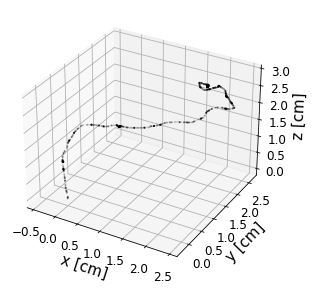

In [4]:
track_index = 3

track = tracks.iloc[track_index].track
plot_track(track)

# Add diffusion to raw tracks

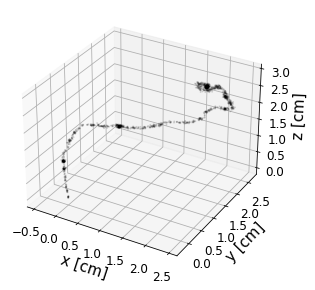

In [5]:
# The paramters, in order, are:
# tracks, a dataframe with the raw track info
# Transverse diffusion coefficent for 70% He 30% CO2 from Magboltz [cm/sqrt(cm)]
# Longitudinal diffusion coefficent for 70% He 30% CO2 from Magboltz [cm/sqrt(cm)]
tracks = xyStripTools.add_diff(tracks, DTrans = 0.0135, DLong = 0.0129)

# Plot a Track
track = tracks.iloc[track_index]["diff_track"]
plot_track(track)

# Simulate readout


Simulates a 10 cm x 10 cm readout plane in the xy-plane centered at the origin

In [6]:
# the parameters, in order, are:
# peaking time [ns]
# digitization time [ns] 
# pitch of the x strips [um]
# pitch of the y strips [um]
# Threshold of x strips [No. electrons]
# Threshold of y strips [No. electrons]
# Charge sharing [lower strips / upper strips]
# Gain - extrapolating from PHA curve
# drift speed cm/ns
# Include charge integration effect.
# z resolution in cm, must be specified if Charge_integration = False
# Electronic gain in x [mV/fC]
# Electronic gain in y [mV/fC]
hits = xyStripTools.sim_readout(tracks, peaking_time = 200, digit_t  = 250, pitch_x = 200, pitch_y = 200,thres_x = 82/9.0*6241.5, thres_y =  82/4.5*6241.5, CS = 0.62, Gain = 60000, v_drift = 0.0008, Charge_integration = True, DL = 1.2, pitch_z = 0.02, G_x = 9.0, G_y = 4.5)
tracks = pd.concat([tracks,hits],axis=1)
tracks.head()

,event_number,npoints,x,y,z,t,q,track,diff_track,strips_x,...,times_x,times_y,electrons_x,electrons_y,adcs0,adcs1,strips0,strips1,times0,times1
0,0,1421,"[-1.5426118, -0.0019720069, -0.00061417016, -0...","[0.19716597, 0.00056022295, -0.00045838192, 0....","[2.1356885, 0.0156014655, 0.02021377, 0.024035...","[780.9511, 247.36115, 62.035988, 2.1953566, 14...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-1.5426118, 0.19716597, 2.1356885], [-0.0019...","[[-1.5163422518340093, 0.18516912103668512, 2....","[-2.090000000000062, -2.0700000000000625, -2.0...",...,"[3104.880005346885, 3073.5246757385635, 2966.9...","[2898.721967212156, 2865.1982566598394, 378.86...","[114814.8148148148, 183703.70370370368, 114814...","[518518.5185185185, 555555.5555555555, 296296....","[165.55849288365508, 264.8935886138481, 165.55...","[373.84175812438247, 400.5447408475526, 213.62...","[145, 146, 147, 147, 148, 148, 149, 149, 150, ...","[250, 251, 252, 252, 253, 253, 254, 254, 255, ...","[3104.880005346885, 3073.5246757385635, 2966.9...","[2898.721967212156, 2865.1982566598394, 378.86..."
1,1,1455,"[-2.2493606, 0.00011934366, 0.0045819758, 0.00...","[-1.6356924, -0.00047184023, -0.0052855257, -0...","[4.7116556, 0.029556258, 0.091615014, 0.103652...","[843.35974, 67.09398, 17.643663, 85.14483, 30....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-2.2493606, -1.6356924, 4.7116556], [0.00011...","[[-2.2638212120500834, -1.6930395518445933, 4....","[-2.3100000000000573, -2.2900000000000578, -2....",...,"[5895.012265812044, 5925.05730384899, 5904.968...","[5898.7843952677285, 5910.489188222497, 5907.8...","[206666.66666666666, 390370.37037037034, 80370...","[555555.5555555555, 925925.9259259258, 1851851...","[298.0052871905792, 562.8988758044273, 1023.0,...","[400.5447408475526, 667.5745680792544, 1023.0,...","[134, 135, 136, 137, 138, 139, 140, 141, 142, ...","[166, 167, 168, 169, 170, 171, 172, 173, 174, ...","[5895.012265812044, 5925.05730384899, 5904.968...","[5898.7843952677285, 5910.489188222497, 5907.8..."
2,2,1417,"[-3.0727463, -8.6530745e-05, 0.006956547, 0.00...","[-1.4782587, -0.00017703052, 0.004311881, 0.00...","[3.2298143, 0.008928755, 0.09060056, 0.1070562...","[829.7765, 3.4645236, 32.024452, 159.96375, 44...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-3.0727463, -1.4782587, 3.2298143], [-8.6530...","[[-3.0901951230977427, -1.4847860118643181, 3....","[-3.1100000000000403, -3.0900000000000407, -3....",...,"[4075.2610079181113, 4074.079590403009, 4069.2...","[4047.857470894649, 4072.1105563179794, 4066.4...","[275555.55555555556, 711851.8518518518, 128592...","[259259.25925925924, 666666.6666666666, 962962...","[397.34038292077224, 1023.0, 1023.0, 1023.0, 1...","[186.92087906219123, 480.6536890170632, 694.27...","[94, 95, 96, 97, 98, 99, 100, 100, 101, 102, 1...","[173, 174, 175, 176, 177, 178, 179, 179, 180, ...","[4075.2610079181113, 4074.079590403009, 4069.2...","[4047.857470894649, 4072.1105563179794, 4066.4..."
3,3,1409,"[1.9531488, -0.00035086353, -0.00039033583, 0....","[1.9645698, -0.0013821152, -0.00064948405, 0.0...","[2.754148, 0.0059577124, 0.018729202, 0.043582...","[832.79114, 166.77058, 87.108925, 19.63413, 6....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[1.9531488, 1.9645698, 2.754148], [-0.0003508...","[[1.9462245684045962, 1.9402195085173983, 2.75...","[-0.33000000000009955, -0.3100000000001, -0.29...",...,"[1685.5576677447252, 1660.7868260817327, 1623....","[45.94784348929151, 148.95840142220885, 430.79...","[298518.5185185185, 390370.37037037034, 528148...","[259259.25925925924, 370370.37037037034, 25925...","[430.45208149750323, 562.8988758044273, 761.56...","[186.92087906219123, 267.02982723170174, 186.9...","[233, 234, 235, 236, 237, 238, 239, 240, 241, ...","[249, 250, 251, 252, 253, 254, 255, 256, 257, ...","[1685.5576677447252, 1660.7868260817327, 1623....","[45.94784348929151, 148.95840142220885, 430.79..."
4,4,1438,"[-1.7506346, -0.001381954, -0.0065577794, -0.0..."

# Perform 3D Reconstruction

[1.63960982e+03 1.61483898e+03 1.57725353e+03 1.53564019e+03
 1.41517981e+03 1.24163207e+03 1.14100120e+03 1.14150881e+03
 9.60414331e+02 9.30406278e+02 8.91069214e+02 7.14276302e+02
 1.80096079e+03 6.29392367e+02 1.81420380e+03 4.39371269e+02
 1.79078556e+03 3.55126911e+02 2.14321346e+02 1.81803441e+03
 3.15223787e+00 1.58534267e+01 1.84896252e+03 1.85716959e+03
 1.82540487e+03 1.82404236e+03 1.83658134e+03 1.83549945e+03
 1.84844906e+03 1.85915672e+03 1.90943724e+03 1.92411515e+03
 1.94272694e+03 1.90795776e+03 1.91306959e+03 1.92016756e+03
 1.94350252e+03 1.94898006e+03 1.94994155e+03 1.96334615e+03
 1.94564986e+03 1.96378764e+03 1.95840902e+03 1.95406581e+03
 1.96124791e+03 1.98115796e+03 1.96751083e+03 1.99306857e+03
 1.98125880e+03 1.97725863e+03 1.98984538e+03 1.95205439e+03
 1.95426605e+03 1.96735502e+03 1.95586170e+03 1.93979870e+03
 1.93499112e+03 1.93375054e+03 1.89999429e+03 1.90974041e+03
 1.84866847e+03 1.83852747e+03 1.83075140e+03 1.81680308e+03
 1.79873462e+03 1.821379

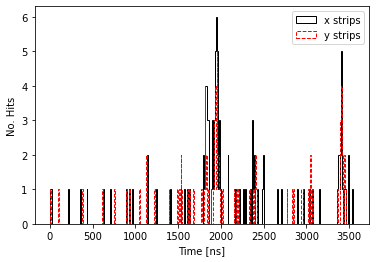

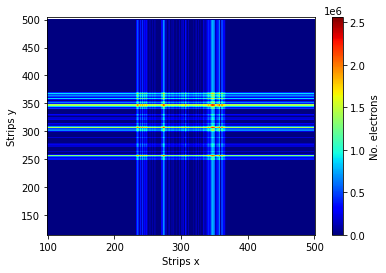

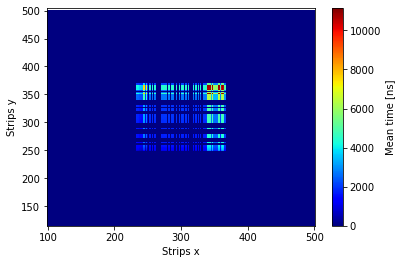

/Users/majdghrear/Desktop/xystripRO/xyStripTools.py:659: RuntimeWarning: invalid value encountered in reciprocal
  abs_t_off = np.reciprocal(abs_t_off,where= abs_t_off!=0)


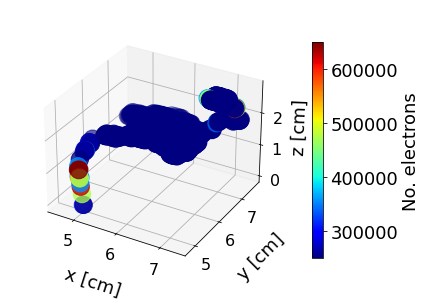

In [7]:

# 3D clustering paramters
mu = T_off.iloc[0]["Mu"]
sigma = T_off.iloc[0]["Sigma"]
n_sigma = 3

# Look at a single event after the cut
test_event = tracks.iloc[track_index]
# Make a TrackTools object for the event
dsp = xyStripTools.TrackTools(event = test_event, Mult_factor = 1.0, gain_x=9, gain_y=4.5, v_drift=8.0)

# Plot 1D time display
dsp.TimeHistView( t_bin =10)

# Plot 2D displays of charge and time
dsp.Strip2DView(fullview = False)
dsp.Strip2DView_times(fullview = False)

# Plot 3D displays
x,y,z,c = dsp.Reconst3D_v1( mu = mu, sigma = sigma , n_sigma = n_sigma)

# Make voxel plot

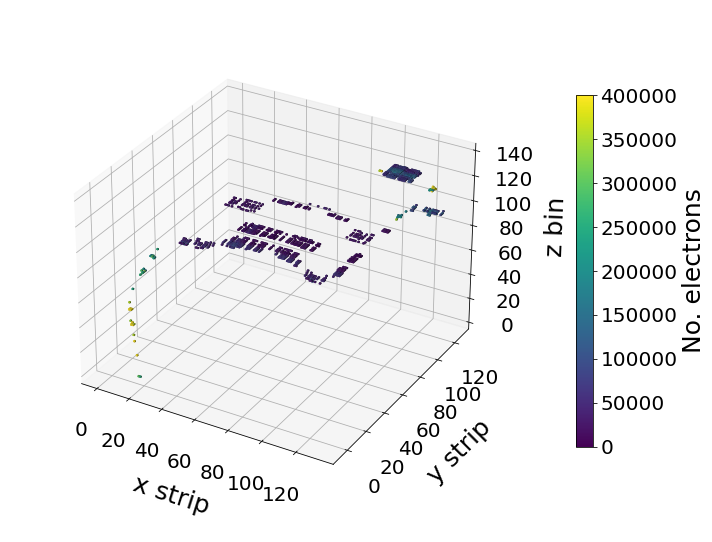

In [8]:
xyStripTools.make_voxel_plot(x,y,z,c)